In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patheffects import withStroke

In [54]:
results = pd.read_csv('val_results_epoch_10.csv')


In [55]:
# Usuń dodatkowe spacje z nazw kolumn
results.columns = results.columns.str.strip()



In [56]:
print(results.columns.tolist())

['DISTILLED MODEL', 'TEACHER MODEL', 'STUDENT MODEL', 'ALPHA', 'BETA', 'GAMMA', 'TEMPERATURE', 'DISTILLATION LOSS', 'DISTILLATION LOSS VALUE', 'LOCALIZATION LOSS', 'LOCALIZATION LOSS VALUE', 'CLASSIFICATION LOSS', 'CLASSIFICATION LOSS VALUE', 'EVALUATION METRICS', 'TOTAL LOSS']


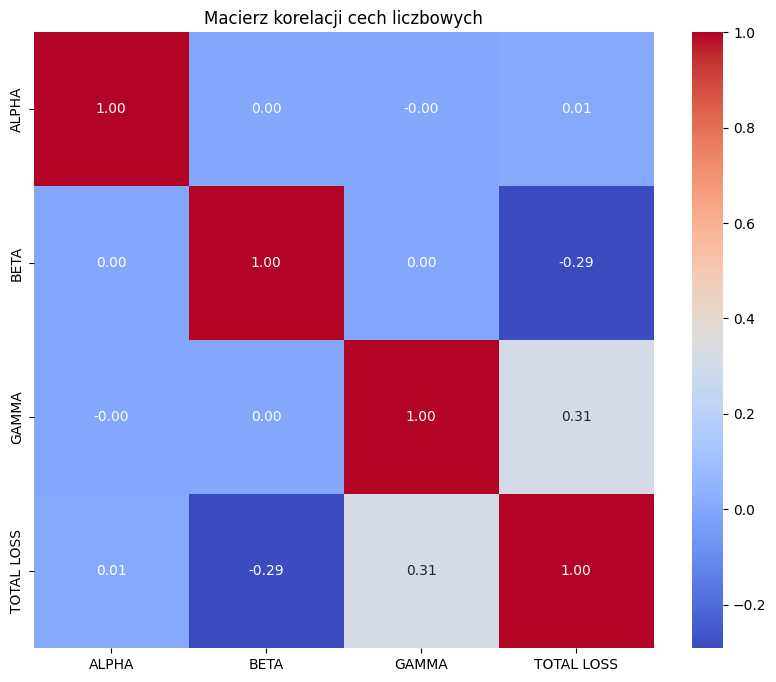

In [57]:
# Wybierz odpowiednie kolumny
selected_columns = ['ALPHA', 'BETA', 'GAMMA', 'TOTAL LOSS']
correlation_matrix = results[selected_columns].corr()
# Wykres ciepły korelacji
plt.figure(figsize=(10, 8),)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji cech liczbowych')
plt.show()

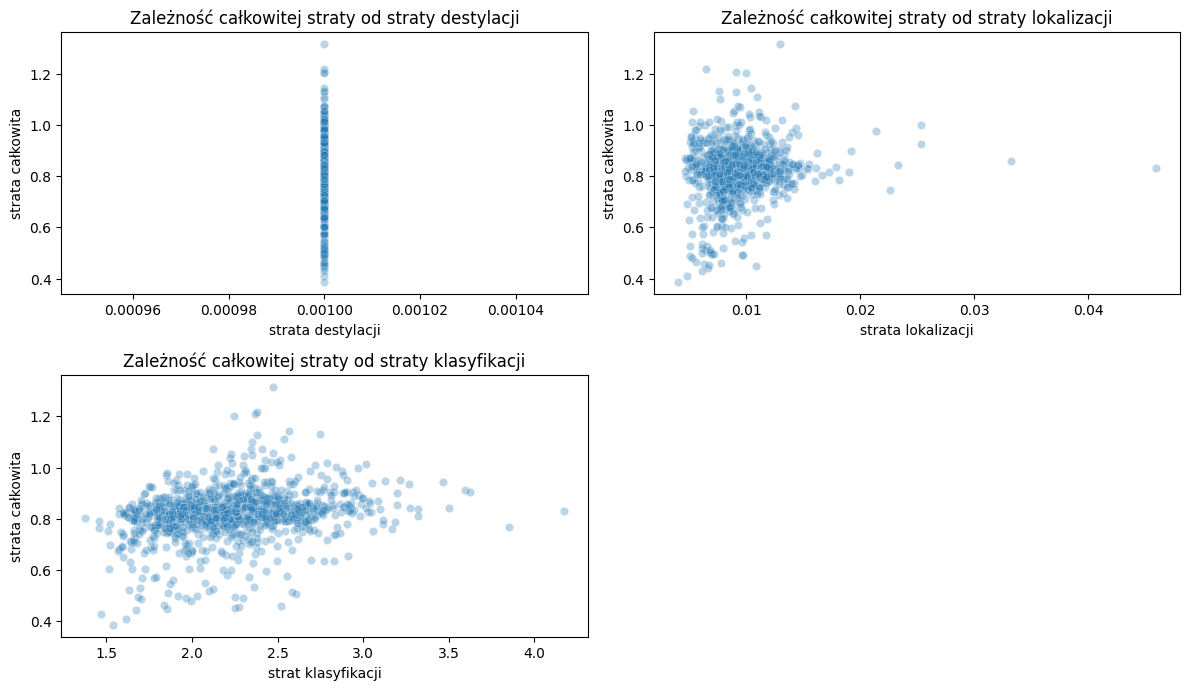

In [58]:
# Wykresy zależności ceny od cech liczbowych
num_cols = ['DISTILLATION LOSS VALUE', 'LOCALIZATION LOSS VALUE', 'CLASSIFICATION LOSS VALUE']

names_dict ={"DISTILLATION LOSS VALUE": "straty destylacji",
             "LOCALIZATION LOSS VALUE": "straty lokalizacji",
             "CLASSIFICATION LOSS VALUE": "straty klasyfikacji"}

names_dict_labels ={"DISTILLATION LOSS VALUE": "strata destylacji",
                    "LOCALIZATION LOSS VALUE": "strata lokalizacji",
                    "CLASSIFICATION LOSS VALUE": "strat klasyfikacji"}

plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=results, x=col, y='TOTAL LOSS', alpha=0.3)
    plt.xlabel(names_dict_labels[col])
    plt.ylabel('strata całkowita')
    plt.title(f'Zależność całkowitej straty od {names_dict[col]}')
plt.tight_layout()
plt.show()

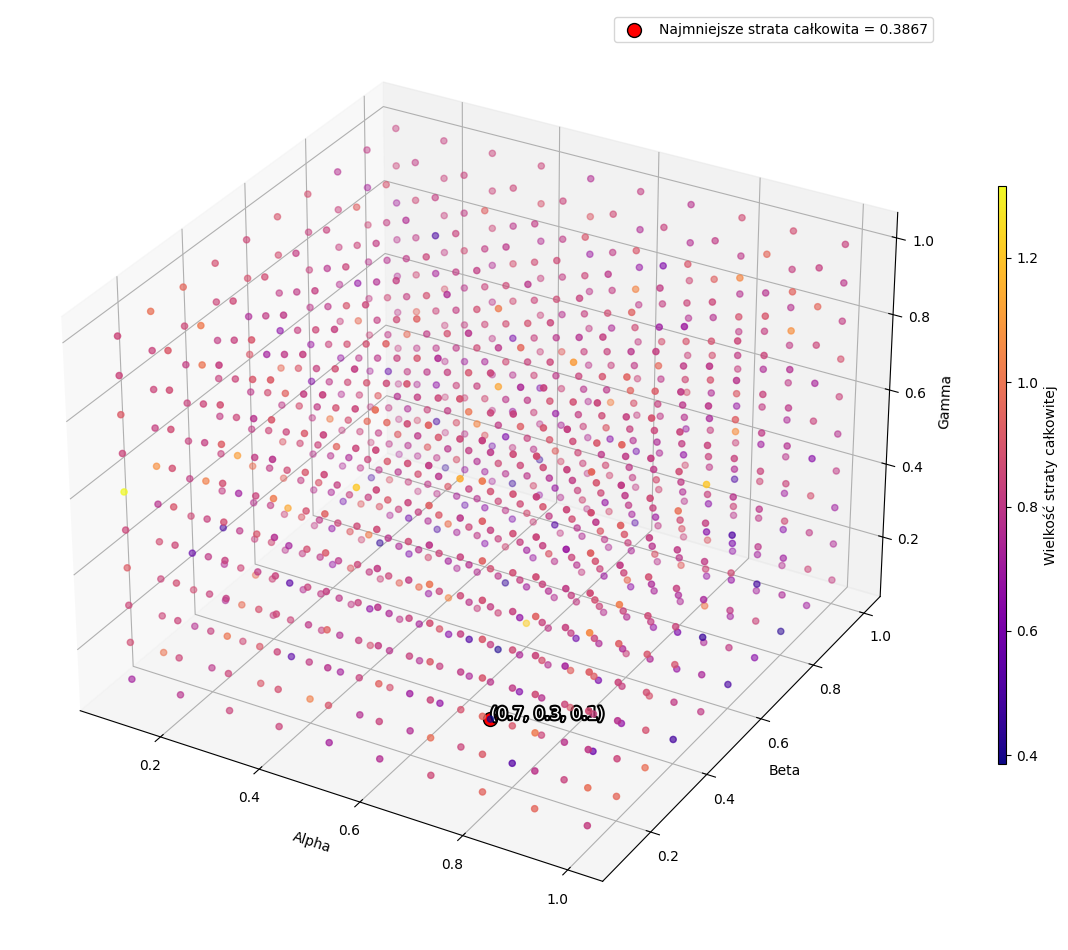

In [59]:
# Załóżmy, że results jest już zdefiniowane
alpha = results['ALPHA']
beta = results['BETA']
gamma = results['GAMMA']
L = results['TOTAL LOSS']

# Znalezienie najmniejszej wartości L
min_index = np.argmin(L)
min_alpha = alpha[min_index]
min_beta = beta[min_index]
min_gamma = gamma[min_index]
min_L = L[min_index]

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(alpha, beta, gamma, c=L, cmap='plasma')
ax.scatter(min_alpha, min_beta, min_gamma, color='red', s=100, label=f'Najmniejsze strata całkowita = {min_L:.4f}', edgecolors='black')
ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Gamma')

# Dodanie paska kolorów
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=70)
cbar.set_label('Wielkość straty całkowitej')

# Dodanie adnotacji
pe = withStroke(linewidth=3, foreground="black")
ax.text(min_alpha, min_beta, min_gamma,
        f'({min_alpha:.1f}, {min_beta:.1f}, {min_gamma:.1f})',
        color='white', fontsize=12,
        path_effects=[pe])

plt.legend()
plt.show()
